In [342]:
using LinearAlgebra
using Plots
using Distributions, Random

Die [Hauptkomponentenanalyse](https://en.wikipedia.org/wiki/Principal_component_analysis) nutzt Eigenwertzerlegungen, 
um Muster in Datensätzen zu finden.

Sie ist dann nützlich, wenn für jede Stichprobe
* viele Variablen erfasst wurden, aber
* tatsächlich nur wenige Faktoren das Verhalten der Stichproben beschreiben.

Verwirrt? Ein Beispiel.

# Beispiel

Eine Touristikveranstalter fragt Reisende, wie sehr sie Skifahren und Snowboarden mögen. Jeweils auf einer Skala von 0 - 100. (Hoffnung: Eine Sportart ist deutlich populärer, und man kann das Angebot darauf beschränken, um Geld zu sparen. Geiz ist geil!)

OK, nur zwei Variablen pro Probanden -- das sind nicht gerade "viele", aber fürs Beispiel reicht es aus.

Hier sind die (ausgedachten) Ergebnisse:

In [346]:
N = 75
data = [1,1]*[z + (rand() > .5 ? 3 : 7) for z in rand(Normal(0,.2),N)]' + [1,-1]*rand(Normal(0,.2),N)'
data = round.(Int,100*data)/10;


In [347]:
data

2×75 Matrix{Float64}:
 32.0  67.0  30.1  25.6  27.5  69.2  …  72.1  33.4  70.4  32.0  31.4  72.9
 26.7  71.2  35.2  29.0  30.0  67.2     72.2  27.0  73.7  29.7  33.7  73.4

Sehr unübersichtlich. Nutzen wir Schulstatistik und schauen uns die Mittelwerte an.

In [360]:
meanValue = 1/N*sum(data,dims=2)

2×1 Matrix{Float64}:
 49.81600000000001
 50.63733333333332

Uff. Quasi identisch! Nichts zu machen, beide Sportarten müssen weiterhin angeboten werden, sonst verlieren wir die Hälfte der Kunden.

Oder?

Plotten wir die Daten:

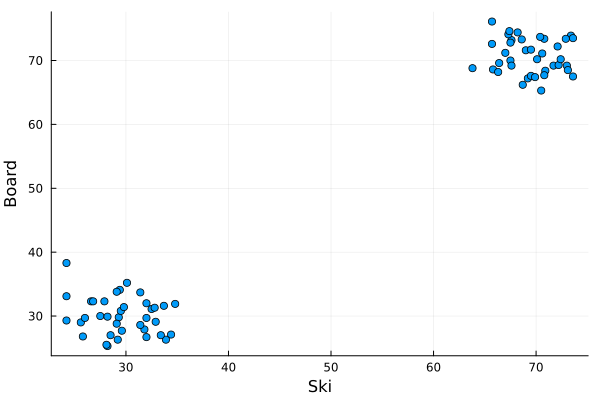

In [376]:
plot(data[1,:], data[2,:], seriestype=:scatter, legend=false, xlabel="Ski", ylabel="Board")

Interessant! Die Bewertungen sind nicht unabhängig! Es scheint, als ob jeder Kunde entweder beide Sportarten, oder keine von beiden mag.

Macht Sinn! "Berge oder Meer" ist eine polarisierende Fragen. "Skifahren" oder "Snowboarden" aber irgendwie egal. 

Anders ausgedrückt: Wir haben *zwei* Variablen gemessen. 
Das Verhalten jeder Stichprobe wird aber, 
bis auf kleine Abweichungen, durch nur *einen* Faktor beschrieben: 
Nämlich ob die Person Wintersport mag, oder eben nicht.

(Der Touristikveranstalter hört bei der weiteren Theorie nicht mehr zu. 
Er ist damit beschäftigt, die Snowboardlehrerin zu entlassen. 
Mit leuchtenden Dollarzeichen in den Augen, natürlich...)

# Ein an die Daten angepasstes Koordinatensystem

Wir formulieren die Beobachtung nun auf eine geometrische Art.

Dazu führt man einen Koordiantenwechsel wie folgt durch: 

1. Der neue Ursprung liegt beim Mittelwert der Daten. 
2. Die neuen Achsen sind um 45 Grad verdreht: $\mathbf{f}_{1/2}=\frac1{\sqrt 2} ( \mathbf{e}_1 \pm \mathbf{e}_2 )$.

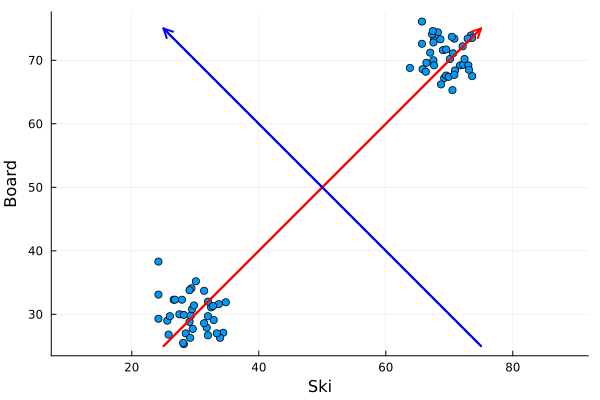

In [399]:
plot(data[1,:], data[2,:], seriestype=:scatter, legend=false, xlabel="Ski", ylabel="Board", aspect_ratio=:equal)
plot!([25, 75],[25, 75], linewidth=2, arrow=(), color=:red)
plot!([75, 25],[25, 75], linewidth=2, arrow=(), color=:blue)

Die Komponente der Datenpunkte bzgl. der ersten neuen Achse (rot)...
* ...schwank stark zwischen Stichproben -- zeigt also eine hohe Varianz,
* ...misst, wie sehr Wintersport gemocht wird.

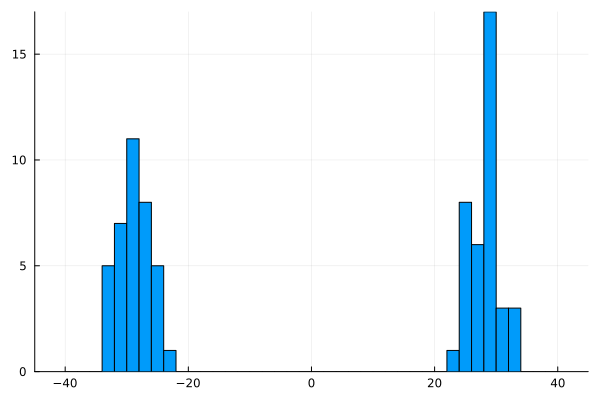

In [400]:
histogram(1/sqrt(2)*(centered[1,:]+centered[2,:]), bins=range(-40, 40, length=41), legend=false)

Die Komponente der Datenpunkte bzgl. der zweiten neuen Achse (blau)...
* ...schwankt wenig zwischen Stichproben -- zeigt also eine kleine Varianz,
* ...misst die relative Präferenz von Skifahren verglichen mit Snowboarden.

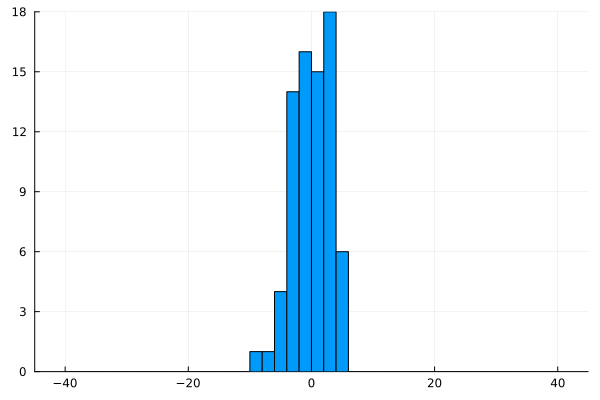

In [401]:
histogram(1/sqrt(2)*(centered[1,:]-centered[2,:]), bins=range(-40, 40, length=41), legend=false)

# Dimensionsreduktion

Da die Komponente bzgl. der zweiten Achse für alle Stichprobem fast konstant ist, geht nicht viel Information verloren, wenn man sie einfach wegläßt. Wir haben damit eine *Dimensionsreduktion* erzielt. 

Eine Reduktion von zwei auf eine Dimension mag nicht sehr beeindruckend erscheinen. Die Methode funktioniert aber oft überraschend gut für hochdimensionale Datensätze, z.B. den >20000 Genen des menschlichen Ergbuts.

# Hauptachsen und Hauptkomponenten

Wir können die Konstruktion verallgemeinern.

Seien $\mathbf{x}_1, \dots, \mathbf{x}_N\in\mathbb{R}^n$ eine Menge von Datenpunkten; 
$\mathbf{m}=\frac1{N} \sum_i \mathbf{x}_i$ ihr Mittelwert.

Betrachten Sie einen normierten Vektor $\mathbf{f}\in\mathbb{R}^n$. 
Die Komponenten der zentrierten Daten bzgl. $\mathbf{f}$ sind durch die inneren Produkte
$\langle \mathbf{f}, \mathbf{x}_i - \mathbf{m} \rangle$ gegeben. 
Der Mittelwert der Komponenten ist offenbar $0$, und ihre Varianz ist
$$
    \mathrm{Var}(\mathbf{f})
    :=
    \frac1{N-1} \sum_i
    \langle \mathbf{f}, \mathbf{x}_i - \mathbf{m} \rangle^2.
$$

**Definition**: 
Die erste *Hauptachse* des Datensatz ist der normierte Vektor $\mathbf{f}_1$, der die Varianz maximiert.

In höheren Dimensionen kann man weitere Hauptachsen definieren. 
Die zweite ist der normierte Vektor $\mathbf{f}_2$ der unter allen Vektoren,
die orthogonal zu $\mathbf{f}_1$ stehen,
die Varianz maximiert. 
Weitere Achsen werden iterative definiert.


# Hauptachsen und lineare Algebra

In der Übung werden Sie beweisen, dass die erste Hauptachse einfach der Eigenvektor der Kovarianzmatrix ist, der zum größten Eigenwert gehört. 

Analoges gilt für die weiteren Hauptachsen.

Hier demonstrieren wir diesen Effekt für das Beispiel:

In [402]:
centeredData = data - mean*ones(N)';
R = 1/(N-1)*centeredData*centeredData';

In [403]:
R # Kovarianzmatrix

2×2 Matrix{Float64}:
 413.924  410.395
 410.395  426.121

In [404]:
ef = eigen(R);
ef.values # Die Eigenwerte

2-element Vector{Float64}:
   9.582344475212393
 830.4626690383011

Der zweite Eigenwert dominiert. Die Eigenvektoren...

In [405]:
ef.vectors[2,:]

2-element Vector{Float64}:
 0.7018341863427208
 0.7123403504509984

In [406]:
ef.vectors[1,:]

2-element Vector{Float64}:
 -0.7123403504509984
  0.7018341863427208

sind bis auf kleine, 
durch statistische Schwankungen verursachte 
Abweichungen mit den um 45 Grad rotierten Achsen identisch.